# ANKUR GURIA : 17039 : DSE 601

In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
from skimage import img_as_ubyte
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import random

Using TensorFlow backend.


In [ ]:
df = pd.read_excel('../input/english-heights-1019/English_heights.xlsx')

df_ = pd.read_excel('../input/bengali-heights/Bengali Height.xlsx')

df___ = pd.read_excel('../input/devnagari-heights-1016/Devnagari Height.xlsx')

#Lets view some of the pics
#plt.figure(figsize=(20,10))
#columns = 5
#for i in range(columns):
#    plt.subplot(5 / columns + 1, columns, i + 1)
#    plt.imshow(X_[i])df__ = pd.concat([df, df_, df___])

the_dataframe = pd.read_excel('../input/wavy-crisscross-filenames/wavy_crisscross_filenames.xlsx')

from sklearn.utils import shuffle
q = random.randint(0, 1000)
df__ = shuffle(df__, random_state = q)
height_dict = dict(zip(df__['N'], df__['Width']))

In [ ]:
import cv2 
from skimage import io
from matplotlib import pyplot as plt 
from skimage.filters import threshold_otsu
import matplotlib
from skimage.filters import try_all_threshold
from PIL import Image
from PIL import ImageDraw
import PIL
from collections import Counter
import random

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

X, y, height_list, so_dict, points_dict, n = [], [], [], {}, {}, 0
for file in list(height_dict.keys()):
    if 'Bengali' in file:
        file_ = file.split('/')[0] + '/' + file.split('/')[1] + '/bengali-handwritten-datab-1020/' + file.split('/')[2] +'/' + file.split('/')[3] + '/' + file.split('/')[4]
    elif 'English' in file:
        file_ = file.split('/')[0] + '/' + file.split('/')[1] + '/big-dataset/' + file.split('/')[2] +'/' + file.split('/')[3] + '/' + file.split('/')[4] + '/' + file.split('/')[5]
    elif 'devanagri'in file:
        file_ = file
     
    # reads an input image 

    img_1 = cv2.resize(cv2.imread(file_, cv2.IMREAD_GRAYSCALE), (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)
    img_ = cv2.threshold(img_1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    #plt.imshow(img, cmap=plt.cm.gray)

    image = img_1
    thresh = threshold_otsu(image)
    binary = image > thresh


    #img = Image.open("../input/normalworddatabase/NormalWordDatabase/nw64.png").convert('RGBA')
    img = PIL.Image.fromarray(img_).convert('RGB')
    
    
    takeClosest = lambda num,collection:min(collection,key=lambda x:abs(x-num))
    #height_ = row_pixel_sums.index(takeClosest(a, row_pixel_sums))
    #height_list.append(height_)
    #print(height_)
    
    # 9 types of strike-outs (wavy and crisscross strikeouts were handled separately)
    points_1 = [[0.027199006949053087, 0.39571888541563527], [0.044798364386675574, 0.40092571285531475], [0.07359731292096713, 0.40352912657515455], [0.07359731292096713, 0.40352912657515455], [0.11166258980309789, 0.41039924611362033], [0.15166112943405818, 0.41763095089095287], [0.1738825403401474, 0.41943887708528554], [0.1994371628821498, 0.42847850805695137], [0.1994371628821498, 0.42847850805695137], [0.21851054057654296, 0.4323956814780068], [0.24073195148263257, 0.43842210212578375], [0.262953362388721, 0.4489683382593937], [0.2833229890526364, 0.45650136406911485], [0.307396184200899, 0.4655409950407806], [0.3323952714702496, 0.4775938363363351], [0.3444318690443812, 0.47608723117438995], [0.36480149570829595, 0.48362025698411215], [0.38887469085655957, 0.48964667763188835], [0.41711440054971477, 0.5001929137654982], [0.4365581350925421, 0.5016995189274437], [0.4592424920591752, 0.5077259395752205], [0.4877808115687937, 0.506361263054892], [0.5110924508400498, 0.5077259395752205], [0.525906724777442, 0.5077259395752205], [0.5481281356835317, 0.5092325447371633], [0.563405355681468, 0.5092325447371633], [0.5870156047691879, 0.5092325447371633], [0.5870156047691879, 0.5092325447371633], [0.5871699201227024, 0.5097347464578126], [0.5983577832525033, 0.5072237378545719], [0.6153324721391, 0.513501259362674], [0.6491428322741798, 0.5263378039183773], [0.6786828929009914, 0.5359512797890323], [0.7207774792941978, 0.550371493595015], [0.7207774792941978, 0.550371493595015], [0.7508098742647888, 0.5547776700357319], [0.7778882631726994, 0.5627888999279449], [0.7778882631726994, 0.5627888999279449], [0.7779908328276545, 0.5624550986824356], [0.8097874258634581, 0.5674621173650688], [0.8374812327010941, 0.5774761547303348], [0.8636364947144161, 0.5808141671854237], [0.8867146670791131, 0.5874901920956007], [0.9133827773672059, 0.5941662170057784], [0.9349224049075894, 0.6025112481434997], [0.9615905151956826, 0.61419429173631], [0.9615905151956826, 0.61419429173631], [0.9697106128795567, 0.6161414656684454], [0.9697106128795567, 0.6161414656684454], [0.9784107115612466, 0.629040068166457], [0.9779322711154946, 0.6461673967551478], [0.975540068886738, 0.6555095759853417], [0.9640574981887097, 0.6523955162419438], [0.9640574981887097, 0.6523955162419438], [0.9509003859305518, 0.6396797722897335], [0.9429263785013643, 0.6331921478243209], [0.9429263785013643, 0.6331921478243209], [0.9243203611665947, 0.623893219423896], [0.9106980984750673, 0.624974490168131], [0.9106980984750673, 0.624974490168131], [0.9017827151688234, 0.6199285600283655], [0.9017827151688234, 0.6199285600283655], [0.8978863169347199, 0.6195051587364125], [0.8842216155350562, 0.6140188025195839], [0.8637135458388085, 0.6083984931143704], [0.8503293319317845, 0.6062908770874149], [0.8503293319317845, 0.6062908770874149], [0.8372329505819001, 0.6035978121640837], [0.8219418459838206, 0.6053541588532129], [0.8122274971803347, 0.5954015276148134], [0.8122274971803347, 0.5954015276148134], [0.8038323809304085, 0.5922791335008062], [0.7903924800327535, 0.5866685323764169], [0.7843589496508234, 0.5837950538504919], [0.7778839414360709, 0.5842739669381457], [0.7778839414360709, 0.5842739669381457], [0.7756520257256818, 0.5830766842190102], [0.7681788755837922, 0.5834530262898632], [0.746883428208753, 0.5802384711255217], [0.7322386551066207, 0.5772124556307336], [0.7018429373155066, 0.5683633024972289], [0.6831627070447517, 0.5645034498486909], [0.6367586429594638, 0.5500290024166731], [0.6367586429594638, 0.5500290024166731], [0.6261748264259894, 0.5448021186217781], [0.6037305462285432, 0.539441212165475], [0.5901404316135764, 0.539441212165475], [0.5658429539686348, 0.5340803057091724], [0.5518410176986686, 0.5334101924021345], [0.5300144699837214, 0.5313998524810207], [0.5014556211803725, 0.5376034492176294], [0.4762273232160947, 0.5421022228512498], [0.4554917358481949, 0.5409775294428446], [0.43544733472589203, 0.5342293689924139], [0.40701386683704777, 0.5277271915226639], [0.3857622914970885, 0.5172027176176536], [0.36543469769364906, 0.5111887325290764], [0.3437211315854298, 0.5051747474404988], [0.33263335314719006, 0.5006642586240658], [0.2933560928784797, 0.4884013267086536], [0.251977443988252, 0.47634203469115605], [0.21368675397042944, 0.4683025066794908], [0.17910161459949284, 0.45222345065616076], [0.14972256849110147, 0.4497738697182079], [0.12131367087996939, 0.44727512599755115], [0.08304683093245607, 0.438018025096563], [0.0515463088546279, 0.438018025096563], [0.036273328453256676, 0.438018025096563], [0.02863683825257106, 0.43180500346398765], [0.020045786776799742, 0.4193789601988369]]
    points_2 = [[0.042995947490239175, 0.4594944847973719], [0.06123665248609822, 0.45745228708716146], [0.07426572748314036, 0.4676632756382142], [0.09055207122944313, 0.46562107792800356], [0.10814132247545002, 0.4594944847973719], [0.1368052874689428, 0.45541008937695104], [0.16742361371199194, 0.44724129853610867], [0.18436141120814672, 0.44519910082589814], [0.20716229245297063, 0.44111470540547726], [0.23582625744646332, 0.43907250769526657], [0.2638387686901038, 0.43294591456463516], [0.29380564118330094, 0.4349881122748455], [0.31660652242812476, 0.4288615191442139], [0.33419577367413184, 0.41660833288295074], [0.3433161261720613, 0.41660833288295074], [0.36025392366821607, 0.42477712372379284], [0.3739344524151103, 0.43703030998505604], [0.3902207961614132, 0.43703030998505604], [0.4156274924056452, 0.4288615191442139], [0.43907982740032114, 0.43294591456463516], [0.4573205323961806, 0.43090371685442436], [0.4781670523914476, 0.4288615191442139], [0.5016193873861239, 0.42681932143400336], [0.5146484623831658, 0.42681932143400336], [0.5354949823784334, 0.41865053059316104], [0.5478726036256234, 0.4206927283033717], [0.5771880223689683, 0.4227349260135822], [0.5973830886143837, 0.4227349260135822], [0.6188810623595034, 0.41660833288295074], [0.6442877586037353, 0.4125239374625296], [0.665785732348855, 0.41048173975231905], [0.6952934563074642, 0.40270259607085657], [0.7241971103802919, 0.395151922394528], [0.7531007644531195, 0.39263503116908516], [0.7876245734845524, 0.3825674662673137], [0.8044850383603686, 0.38005057504187084], [0.8173311068371808, 0.3825674662673137], [0.8462347609100085, 0.38508435749275655], [0.8711240185838323, 0.38508435749275655], [0.8968161555374567, 0.3825674662673137], [0.9233111717708821, 0.38005057504187084], [0.9409745159264989, 0.3825674662673137], [0.9490033087245067, 0.38005057504187084], [0.9538205844033112, 0.40773637852174227], [0.9490033087245067, 0.42535461709984224], [0.9449889123255028, 0.4480066381288279], [0.9385658780870967, 0.45052352935427076], [0.9409745159264989, 0.4329052907761708], [0.9409745159264989, 0.4228377258743994], [0.9393687573668974, 0.4178039434235137], [0.9024363104960621, 0.4178039434235137], [0.8791528113818399, 0.4228377258743994], [0.8430232437908054, 0.42032083464895653], [0.8052879176401693, 0.42535461709984224], [0.7852159356451501, 0.43038839955072794], [0.7659468329299317, 0.4329052907761708], [0.7386489374167057, 0.4329052907761708], [0.7225913518206903, 0.4379390732270565], [0.706533766224675, 0.4429728556779422], [0.6920819391882612, 0.44548974690338505], [0.6784329914316481, 0.4480066381288279], [0.6503322166386213, 0.45555731180515646], [0.6294573553638013, 0.45555731180515646], [0.6077796148091806, 0.45555731180515646], [0.5957364256121691, 0.463107985481485], [0.5700442886585446, 0.463107985481485], [0.5531838237827285, 0.46059109425604217], [0.5282945661089047, 0.463107985481485], [0.5058139462744832, 0.4681417679323707], [0.496179394916874, 0.4731755503832564], [0.47369877508245256, 0.4706586591578136], [0.4528239138076326, 0.4706586591578136], [0.43435769037221494, 0.4731755503832564], [0.41749722549639884, 0.47820933283414213], [0.3950166056619774, 0.4756924416086993], [0.3797618993457628, 0.4756924416086993], [0.36611295158914975, 0.47820933283414213], [0.3572812795113413, 0.480726224059585], [0.3460409695941306, 0.4756924416086993], [0.33158914255771677, 0.4731755503832564], [0.3195459533607053, 0.4756924416086993], [0.3042912470444907, 0.4731755503832564], [0.2922480578474792, 0.4731755503832564], [0.2697674380130577, 0.4731755503832564], [0.24889257673823778, 0.4756924416086993], [0.22320043978461324, 0.47820933283414213], [0.19590254427138715, 0.48324311528502784], [0.18305647579457487, 0.5008613538631278], [0.16378737307935648, 0.498344462637685], [0.1388981154055327, 0.5008613538631278], [0.10758582349330278, 0.498344462637685], [0.08831672077808438, 0.5109289187648992], [0.06904761806286597, 0.5134458099903421], [0.046566998228444484, 0.5134458099903421], [0.036129567591034514, 0.5008613538631278], [0.034523809031432984, 0.48324311528502784]]
    points_3 = [[0.10743261914733865, 0.84684605651842], [0.11323978774989754, 0.8643067999517894], [0.12195054065373576, 0.8520842795484316], [0.1283533596222342, 0.8328560794755279], [0.13973954475001304, 0.8129372494731238], [0.15526616083334793, 0.7880387119701183], [0.16665234596112666, 0.7681198819677143], [0.1821789620444616, 0.7432213444647084], [0.1987406858666852, 0.7233025144623044], [0.21530240968890899, 0.7046286113350507], [0.23496945672779967, 0.6859547082077965], [0.24532053411668975, 0.6697706588308431], [0.24532053411668975, 0.6598112438296413], [0.2525662882889124, 0.6486069019532884], [0.25774182698335746, 0.6486069019532884], [0.26188225793891334, 0.6535866094538897], [0.2670577966333583, 0.6523416825787396], [0.28154930497780417, 0.6374025600769364], [0.31053232166669587, 0.6100141688236302], [0.3415855538333651, 0.5851156313206252], [0.3757441092167017, 0.5589721669424695], [0.3974813717333704, 0.5427881175655159], [0.41921863425003913, 0.5241142144382619], [0.4409558967667078, 0.5054403113110081], [0.4647633747611546, 0.48801133505890426], [0.5030623611000471, 0.4631127975558989], [0.5268698390944938, 0.4431939675534949], [0.5486071016111626, 0.4245200644262404], [0.5806954415167208, 0.4008664537983856], [0.6065731349889455, 0.3871722581717326], [0.6262401820278365, 0.36974328191962935], [0.6521178755000608, 0.35231430566752536], [0.6873115386222864, 0.32741576816452], [0.7100839088778442, 0.3087418650372659], [0.7579449656361704, 0.26968576405656247], [0.7829627090006895, 0.25185530031728554], [0.8177954181967888, 0.22624113803567397], [0.8460561669897667, 0.20606000365690502], [0.8690180253840615, 0.19118969411465409], [0.8813821029809883, 0.18056804444161761], [0.8990450709765996, 0.17207072470318868], [0.9202406325713329, 0.17631938457240326], [0.9343710069678223, 0.18587886927813585], [0.9387867489667246, 0.20606000365690502], [0.9343710069678223, 0.21455732339533395], [0.9175911873719911, 0.21986814823185227], [0.9087597033741854, 0.21455732339533395], [0.9096428517739662, 0.20606000365690502], [0.8946293289776969, 0.20818433359151223], [0.8813821029809883, 0.21030866352611963], [0.8752000641825247, 0.21986814823185227], [0.8725506189831831, 0.23155196287219212], [0.8548876509875724, 0.2358006227414067], [0.8460561669897667, 0.23367629280679933], [0.8319257925932779, 0.24536010744713932], [0.8142628245976664, 0.2559817571201758], [0.792184114603153, 0.27297639659703377], [0.7736379982077618, 0.28678454117198116], [0.7603907722110534, 0.3027170156815357], [0.7400783590161013, 0.31333866535457194], [0.7171165006218065, 0.33139546979873374], [0.6968040874268535, 0.35051443921019915], [0.6764916742319013, 0.36538474875244986], [0.6544129642373872, 0.3791928933273975], [0.6305679574433128, 0.397249697771559], [0.6058398022494573, 0.41636866718302445], [0.5766959050566991, 0.4354876365944899], [0.5353233837185718, 0.4656517954316728], [0.49384075988798143, 0.4953489762627745], [0.458284225176047, 0.5238582698606319], [0.4395182763003035, 0.5393008038928048], [0.4148262383059045, 0.5559312251582216], [0.38618347423240157, 0.5773131953566147], [0.35062693952046686, 0.6046346017212283], [0.31309504176898023, 0.6378954442520617], [0.29037836681413315, 0.6557137527507229], [0.2696370548988379, 0.6830351591153363], [0.23605588322645518, 0.7222354378123904], [0.20247471155407235, 0.7614357165094445], [0.18272108115855318, 0.7887571228740577], [0.16790585836191374, 0.8137027547721835], [0.15183768216291849, 0.8334039699558955], [0.1530101739170723, 0.8460954009704523], [0.14480273163799562, 0.8637223884906701], [0.13659528935891896, 0.8799392170092704], [0.12428412594030394, 0.8898103300205923], [0.10845548725922749, 0.8869900120173575], [0.09614432384061247, 0.8813493760108878], [0.09379934033230486, 0.8693630244971398], [0.09555807796353558, 0.8559665139817743]]
    #'N'points_4 = [[0.043666662348669574, 0.4877756458274995], [0.06238094621238511, 0.49044108651508145], [0.08465985557395123, 0.5037682899529913], [0.1122857031822932, 0.5011028492654093], [0.13189114342047137, 0.5011028492654093], [0.17021086752236508, 0.49577196789024536], [0.19783671513070705, 0.49044108651508145], [0.22011562449227318, 0.4797793237647536], [0.24328569022830193, 0.47444844238958966], [0.2762584760834198, 0.46911756101442575], [0.30210201094283645, 0.4584557982640979], [0.32794554580225316, 0.45045947620135196], [0.3528979242872072, 0.44512859482618805], [0.37606799002323593, 0.4344668320758602], [0.40993193225281643, 0.42380506932553236], [0.4429047181079343, 0.41580874726278644], [0.4705305657162763, 0.4131433065752045], [0.4919183187033797, 0.4078124252000406], [0.5222176354351097, 0.40514698451245856], [0.5632108286603913, 0.39981610313729465], [0.5944013017665838, 0.3971506624497127], [0.6202448366260005, 0.39448522176213074], [0.6558910916045063, 0.3918197810745488], [0.6933196593319374, 0.3971506624497127], [0.7245101324381299, 0.4024815438248766], [0.7557006055443225, 0.39981610313729465], [0.7886733913994404, 0.40514698451245856], [0.8171903953822449, 0.40514698451245856], [0.851945493986288, 0.4131433065752045], [0.8688774651010783, 0.41580874726278644], [0.8920475308371071, 0.4184741879503684], [0.9161087529475985, 0.42113962863795035], [0.9312584113134634, 0.4184741879503684], [0.9481903824282537, 0.4264705100131143], [0.9588842589218054, 0.43713227276344213], [0.9660135099175066, 0.4557903575765159], [0.9588842589218054, 0.4637866796392618], [0.9517550079261042, 0.44779403551377], [0.9455169133048658, 0.44779403551377], [0.9339318804368514, 0.45312491688893397], [0.9169999093220611, 0.4557903575765159], [0.9036325637051215, 0.45045947620135196], [0.8920475308371071, 0.45045947620135196], [0.8768978724712422, 0.44779403551377], [0.8564012758586013, 0.4424631541386061], [0.8341223664970352, 0.4424631541386061], [0.80204073701638, 0.4344668320758602], [0.7886733913994404, 0.4424631541386061], [0.7663944820378742, 0.43713227276344213], [0.7352040089316817, 0.4344668320758602], [0.7022312230765638, 0.4264705100131143], [0.6781700009660724, 0.4264705100131143], [0.6469795278598799, 0.4318013913882782], [0.6024217091367476, 0.4264705100131143], [0.5676666105327045, 0.4318013913882782], [0.518653009937259, 0.43713227276344213], [0.47409519121412685, 0.44779403551377], [0.43666662348669577, 0.44779403551377], [0.4045849940060406, 0.4584557982640979], [0.36804758265307214, 0.46911756101442575], [0.34042173504473017, 0.4797793237647536], [0.31012241831300025, 0.49044108651508145], [0.27982310158127033, 0.5011028492654093], [0.24952378484954044, 0.5064337306405732], [0.22635371911351168, 0.5117646120157372], [0.2085305916242588, 0.5170954933909011], [0.18625168226269267, 0.522426374766065], [0.16931971114790245, 0.525091815453647], [0.14971427090972428, 0.5304226968288109], [0.11139454680783055, 0.5357535782039748], [0.09357141931857767, 0.5410844595791388], [0.06594557171023568, 0.5410844595791388], [0.042775505974206936, 0.5330881375163928], [0.03297278585511784, 0.5170954933909011], [0.03742856772743107, 0.4984374085778273]]
    #'N'points_5 = [[0.006223660228539785, 0.6525596659055803], [0.017474731356347722, 0.6521569742188971], [0.03137508584435159, 0.6558624115724135], [0.058680225011946585, 0.6525596659055803], [0.09246580910973401, 0.6442644159152552], [0.12002773297898166, 0.6442644159152552], [0.1431441852564152, 0.6359691659249306], [0.1804861466276538, 0.6387342492550385], [0.2043970903011637, 0.6340656471636149], [0.22923521773016578, 0.6324563434906106], [0.2582130330640017, 0.6324563434906106], [0.2871908483978375, 0.6276284324715988], [0.3197908906484028, 0.6292377361446024], [0.34928616697034304, 0.6308470398176071], [0.3782639823041788, 0.6292377361446024], [0.40568941467370223, 0.6292377361446024], [0.42949262012649575, 0.6324563434906106], [0.45484820854360203, 0.6405028618556312], [0.477099031032083, 0.6405028618556312], [0.5065943073540236, 0.6437214692016394], [0.5324673567592338, 0.6469400765476477], [0.5536832572715067, 0.648549380220652], [0.5774864627243004, 0.6517679875666599], [0.5992198242246772, 0.6582052022586765], [0.6162960368321163, 0.6582052022586765], [0.6328547884514509, 0.6565958985856721], [0.6504484620469942, 0.6549865949126685], [0.6633849867495997, 0.6501586838936558], [0.6921724708310224, 0.638655401214258], [0.7066063991327121, 0.6304936708473025], [0.7249768533348621, 0.6100893449299143], [0.742035132236859, 0.5835637212373094], [0.7590934111388554, 0.5468359345860099], [0.7630299370393167, 0.5243911760768828], [0.7695908135400844, 0.5121485805264496], [0.7800882159413132, 0.5080677153429719], [0.7879612677422345, 0.5223507434851439], [0.7899295306924653, 0.5407146368107933], [0.7794321282912364, 0.5754019908703537], [0.7689347258900077, 0.5917254516042647], [0.7538447099382413, 0.6039680471546977], [0.7387546939864751, 0.622331940480347], [0.7223525027345548, 0.6488575641729522], [0.7098868373830959, 0.6611001597233852], [0.6987333473317904, 0.6713023226820792], [0.6842994190301007, 0.6753831878655572], [0.6501828612261071, 0.6876257834159901], [0.6180345663723439, 0.6957875137829456], [0.6038416497817302, 0.6940240874773929], [0.5936980647557525, 0.6958797668556748], [0.5753888691173522, 0.691706648599468], [0.5462854171046463, 0.6849826341826372], [0.5299326263213454, 0.6849826341826372], [0.4992827017084437, 0.677423620457296], [0.46582223155452696, 0.6753831878655572], [0.4415469885016853, 0.6692618900903406], [0.429737410800303, 0.6631405923151241], [0.4074304306976917, 0.6692618900903406], [0.3700334346433142, 0.6631405923151241], [0.33919731508970474, 0.6631405923151241], [0.28719151087456585, 0.6660895991199254], [0.2525770914847876, 0.6644075546777034], [0.22607542663948876, 0.6660895991199254], [0.194165258764537, 0.6660895991199254], [0.1627959411925505, 0.6694536880043694], [0.14195199028189415, 0.666763991639132], [0.11724648164876217, 0.674577632166153], [0.0893594217085963, 0.6780950356935124], [0.06197314030005999, 0.6784844524296635], [0.0439674306182858, 0.6797867258508338], [0.023449296329752428, 0.6862980929566846], [0.0091345186635454, 0.6892113477540617], [0.0007943059707430783, 0.6867410561850508], [0.00039715298537153915, 0.6546272657879081], [0.0035743768683438523, 0.6558624115724135]]
    #'N'points_6 = [[0.07298026943470332, 0.5417591402989239], [0.17788940674708933, 0.5331140476345794], [0.26607389898068917, 0.5259098037476257], [0.3649013471735166, 0.5235083891186411], [0.4470041502875578, 0.5235083891186411], [0.4470041502875578, 0.5235083891186411], [0.5448179836271254, 0.5243088606616358], [0.5448179836271254, 0.5243088606616358], [0.6546262593969338, 0.5269770991382855], [0.7454292566681212, 0.5236418010424736], [0.8172269754406882, 0.5219741519945675], [0.9006390310735233, 0.5203065029466616], [0.9418171344872013, 0.5219741519945675], [0.9502639249310328, 0.5286447481861914], [0.9449846809036382, 0.5403182915215332], [0.9133092167392705, 0.5419859405694392], [0.821450370662604, 0.546988887713157], [0.7464851054736003, 0.546988887713157], [0.651458712980497, 0.546988887713157], [0.5469296812380833, 0.546988887713157], [0.4466240447175854, 0.551991834856875], [0.3706029307231028, 0.546988887713157], [0.2671297477861681, 0.546988887713157], [0.18477354095881193, 0.5553271329526869], [0.11951621895351724, 0.5581991952018583], [0.0652573220052947, 0.5593572848184597], [0.051325983599669986, 0.5500925678856488], [0.06452409366815655, 0.5419859405694392]] 
    points_7 = [[0.06120993522686057,0.27433180060765666],[0.06260107011838016,0.31217066965698864],[0.06260107011838016,0.31217066965698864],[0.061441791042113905,0.35079784847818163],[0.061441791042113905,0.35079784847818163],[0.05796395381331501,0.39415488593054204],[0.0569978879164264,0.4467088707212798],[0.0627942832977578,0.4894089833637555],[0.06859067867908929,0.5518168403027575],[0.07535313995730941,0.5978015769946551],[0.08597986482308366,0.6273631934394447],[0.0977989516962107,0.6587292424201636],[0.1107770116369399,0.6807919443194019],[0.12792659084433236,0.7028546462186425],[0.14646667647394554,0.7186137190038139],[0.14646667647394554,0.7186137190038139],[0.16454325996281854,0.7288571163141766],[0.1803795831047803,0.731483628445037],[0.1803795831047803,0.731483628445037],[0.20085092765414483,0.7266683562051245],[0.20085092765414483,0.7266683562051245],[0.21404786360577951,0.7232028193657926],[0.21404786360577951,0.7232028193657926],[0.22888524327293241,0.7075869457830224],[0.22888524327293241,0.7075869457830224],[0.23867178508826667,0.6881203823353771],[0.2496566789626223,0.6643530664981356],[0.2596429461211268,0.6462446353840459],[0.2692963377076817,0.6224773195468039],[0.2776182270064355,0.5953146728756713],[0.28460861401738946,0.5715473570384297],[0.2939291300319942,0.5409893795334045],[0.30225101933074777,0.509299625083749],[0.309574281913651,0.48326875535724656],[0.3182290467843557,0.45497433174148305],[0.32688381165506036,0.43347056979350274],[0.3345399498099136,0.41423036173478295],[0.3415303368208672,0.40178081534384663],[0.34985222611962075,0.3983854845099555],[0.36389359103819013,0.3945022405243734],[0.37928109145923317,0.3973302135747273],[0.39009392959293954,0.39874420009990447],[0.4035656444008922,0.40737205133629106],[0.4174071241659819,0.42060796636165754],[0.4273556877471393,0.43090256693694345],[0.4407646212695694,0.45149176808751385],[0.44682026866679575,0.47208096923808485],[0.4507131848507275,0.5000234565138595],[0.4507131848507275,0.5000234565138595],[0.45309218918535377,0.5208577672019366],[0.45849901721859077,0.556398650140422],[0.4646267556562607,0.5870373423287712],[0.46859176288063586,0.6066461053293138],[0.46859176288063586,0.6066461053293138],[0.47520010825459225,0.6311570590799941],[0.48060693628783074,0.6474976949137798],[0.4863141436562491,0.6669021999664014],[0.4863141436562491,0.6669021999664014],[0.49237179358237676,0.6842641255397993],[0.49237179358237676,0.6842641255397993],[0.5002627937750186,0.7015948657402161],[0.5002627937750186,0.7015948657402161],[0.5083346973942208,0.7107013433124698],[0.5083346973942208,0.7107013433124698],[0.5183204829402838,0.7193795730829946],[0.5183204829402838,0.7193795730829946],[0.5301258310063468,0.726166872699016],[0.5301258310063468,0.726166872699016],[0.5372814988236371,0.7278163147721549],[0.5512289869420838,0.7298781173635771],[0.5615379998991971,0.7278163147721549],[0.5724534253831984,0.7288472160678655],[0.5806399944961994,0.72472361088502],[0.5909490074533119,0.7175073018150426],[0.5994387828297573,0.7030746836750851],[0.6096129869639857,0.6863010036751468],[0.6181248704255843,0.6642511722317691],[0.6278527372388395,0.639445111857968],[0.6339326539971235,0.6229077382754348],[0.6403616030137531,0.6057961503323969],[0.6468355884508162,0.5895267434514306],[0.6507762752385937,0.5761284083729897],[0.6561243501648609,0.554116857886979],[0.6630269138327732,0.5265930292015684],[0.6712929974041792,0.4999675389610388],[0.6821694231560295,0.4718628548182588],[0.6821694231560295,0.4718628548182588],[0.6881152025670402,0.4462234938458977],[0.7000792708940762,0.41417429263044653],[0.7095055065456793,0.39075372251146256],[0.7211070273476518,0.36363516763685066],[0.734883833299996,0.3426799206882863],[0.7450351640017229,0.3291206432509796],[0.7537363046032033,0.3229573353249316],[0.7642501828299901,0.314328704228464],[0.7733138709565325,0.32049201215451184],[0.7776644412572733,0.3365166127622377],[0.7816524640329507,0.3476105670291246],[0.7885408670091226,0.3648678292220601],[0.7947041749351708,0.3771944450741567],[0.7997798402860339,0.3919863840966724],[0.8088435284125763,0.41170896946002666],[0.8206068718531302,0.44250119473166394],[0.8286805325364548,0.46116749823151115],[0.8341706218011156,0.4809318195842904],[0.8409524967751082,0.4974020873782728],[0.847088478894436,0.5204604622898475],[0.8561309788597583,0.5380287479367623],[0.8664551007052467,0.5577777728506125],[0.8772480142665986,0.568052626561019],[0.8850189120307718,0.5739239715383934],[0.8954520618067437,0.5749025290346225],[0.9073242667242294,0.5712329384237642],[0.9177574165002008,0.555331379110039],[0.9292698576323082,0.5394298197963162],[0.9375444246960116,0.5271978510934516],[0.9490568658281201,0.5112962917797284],[0.9490568658281201,0.5112962917797284],[0.9558351497382234,0.4967067599586457],[0.9588517620232404,0.4893807015521758],[0.9653159312054191,0.49084591323347015],[0.9666087650418554,0.5098936650902908],[0.9666087650418554,0.5098936650902908],[0.9620838466143291,0.5250341857969947],[0.9441278211082768,0.5518963999540504],[0.9268900366224657,0.5750955849078719],[0.9107296136670173,0.5958527503928692],[0.9006742393836289,0.6068418380025733],[0.8927735881609649,0.6068418380025733],[0.885232057448422,0.6068418380025733],[0.8780496472460017,0.6031788087993383],[0.8687125139828531,0.5946317406584567],[0.8687125139828531,0.5946317406584567],[0.856278169024225,0.5774188367081236],[0.8467677411255022,0.5600962716068809],[0.8467677411255022,0.5600962716068809],[0.8361251194293149,0.5360371534107085],[0.8283505145778429,0.5140885793689932],[0.8180165291694524,0.4863499869569974],[0.8180165291694524,0.4863499869569974],[0.8117617485275315,0.46847400518037796],[0.8011104916373042,0.4443311562291961],[0.7925491976829852,0.4205735655059587],[0.784680361327911,0.4002404923644495],[0.7790147991522584,0.3852582279443898],[0.7742934973392152,0.36599531654717016],[0.7702017024345772,0.35636386084856037],[0.7667394144383444,0.35315337561569055],[0.7617033591710982,0.34994289038282106],[0.7566673039038502,0.35208321387140085],[0.751631248636604,0.3585041843371405],[0.7456509330067473,0.3649251548028806],[0.7396706173768924,0.3745566105014904],[0.735893575926456,0.38097758096723],[0.7264509723003693,0.39703000713157904],[0.7198411497621081,0.41201227155163894],[0.7103985461360195,0.4323453446931485],[0.7056772443229754,0.4473276091132081],[0.6962346406968875,0.4730114909761677],[0.688680557796017,0.4997655345834162],[0.6789232007157255,0.5254494164463762],[0.6719986247232617,0.5484578939486104],[0.6664904392747107,0.5743201361022842],[0.6593739874207356,0.6004660382361874],[0.6524026324876532,0.6231810363931487],[0.6439789119435112,0.6429332087035485],[0.6378789763770643,0.6587349465518696],[0.6306171483217692,0.6794747274777911],[0.6211283596628511,0.7020251241988313],[0.6071642812841066,0.7295651585385461],[0.5926439663198281,0.7496784837112886],[0.5786614407986699,0.762477872457579],[0.5786614407986699,0.762477872457579],[0.5633344416697089,0.7649158512663956],[0.5482148522203762,0.7663608378392597],[0.531115523181366,0.7663608378392597],[0.5155706786004484,0.7593138416292429],[0.5155706786004484,0.7593138416292429],[0.5034802439264016,0.7487433473142183],[0.49441241792086554,0.7369983536308589],[0.48404918820025367,0.7135083662641386],[0.47627676590979434,0.6914865031078373],[0.46850434361933574,0.6650602673202772],[0.4628592765598011,0.6406420444968578],[0.45725855929805737,0.6134385606541044],[0.45165784203631376,0.5930359477720379],[0.4452570223086074,0.5658324639292842],[0.44125650997878973,0.531828109125842],[0.4388562025808998,0.5032644510909499],[0.4388562025808998,0.5032644510909499],[0.43405558778512016,0.48286183820888506],[0.42471867615330244,0.4661015215220857],[0.42471867615330244,0.4661015215220857],[0.41639085897382583,0.45557430647213165],[0.4035788325438621,0.44831415816181874],[0.3955713160251348,0.44286904692908424],[0.38863146837557105,0.4410540098515057],[0.3784886141185159,0.4356088986187717],[0.36887959429604306,0.43197882446361513],[0.3582029056044066,0.4337938615411934],[0.34645854804360626,0.44831415816181874],[0.33515763456254255,0.4693534240844156],[0.32520245729830854,0.49868801308969196],[0.31458360154979254,0.5302791089415275],[0.30529210276984065,0.5663832184864827],[0.30529210276984065,0.5663832184864827],[0.2942307946984697,0.597974314338318],[0.28263950558133893,0.6326776624936126],[0.28263950558133893,0.6326776624936126],[0.26853465203192933,0.6665691670546184],[0.2545890118901747,0.6946874693869477],[0.2545890118901747,0.6946874693869477],[0.24290007901942082,0.724781404072692],[0.23175167483633197,0.7420107559920107],[0.23175167483633197,0.7420107559920107],[0.2189860869045393,0.7522923284845334],[0.2048726384761801,0.7608059247945435],[0.19027606924673746,0.7629414252417456],[0.17321683545220232,0.7629414252417456],[0.1553196008468434,0.7590236151475712],[0.13729819788163522,0.7466029568140459],[0.12321633143223673,0.7301447754013115],[0.1034137067377701,0.7062056024373339],[0.08933184028837164,0.6822664294733565],[0.07877044045132278,0.6598234548196275],[0.06908915726736133,0.6328918852351532],[0.06908915726736133,0.6313956869249044],[0.060141304627639364,0.5997261560246426],[0.05537400609008258,0.5560870386423922],[0.05537400609008258,0.5560870386423922],[0.04950656173616655,0.5039279031045595],[0.04522821689476945,0.45301559949193376],[0.04469405746683905,0.41270898974492504],[0.04672560553351355,0.36263132990139857],[0.05028081465019393,0.3211877493412387],[0.04926504061685668,0.2935586956344655],[0.05129658868353118,0.26765645778436564],[0.05739123288355469,0.2607491943576723]]
    points_8 = [[0.04082794274640529,0.36034573657004315],[0.04606229438055983,0.3978477815524457],[0.05600756248545342,0.42067511328086477],[0.06699970091717795,0.46306872934792875],[0.09421832941478145,0.5886190538542335],[0.14132749412217221,0.7679766602918113],[0.1706398632734375,0.6897115229372317],[0.19367101046371754,0.6310126699212973],[0.21879589830765903,0.5657917221258142],[0.24235048066135464,0.49894025063544417],[0.2685222388321271,0.4320887791450745],[0.29469399700289967,0.3668678313495912],[0.29469399700289967,0.3668678313495912],[0.3105715302931685,0.3165933507572402],[0.31755066580537444,0.33425735745185],[0.3236574093785551,0.3872493775356801],[0.3319451327992994,0.4225773909248999],[0.3415414441285828,0.47692818075446897],[0.3781819055676645,0.6644384056664824],[0.4047898597079499,0.7744987550713602],[0.44317510502508345,0.6440568594803937],[0.45495239620193095,0.6114463855826525],[0.45495239620193095,0.6114463855826525],[0.46418521088995374,0.584270990667868],[0.48962997577820466,0.4993478815591657],[0.5067143179174596,0.44952632421539457],[0.5366067150876696,0.38899836905236046],[0.5433992051520706,0.3857431525749346],[0.5475791990378557,0.4052744514394883],[0.5475791990378557,0.4052744514394883],[0.5629929264916885,0.47065004902778595],[0.5629929264916885,0.47065004902778595],[0.583582269270765,0.5635442232108484],[0.6017381620925222,0.6483788374576428],[0.6017381620925222,0.6483788374576428],[0.6203263380767019,0.7221041569816423],[0.6370773106205849,0.7793338570687658],[0.6478843896811547,0.8197312924243823],[0.6500458054932687,0.826464198316985],[0.6722003175674366,0.752402233498355],[0.6830073966280064,0.6800234951528761],[0.6984074842893181,0.5849211994198621],[0.7078636784673165,0.5344244052253415],[0.7294778365884561,0.4558738364783096],[0.7474896350227391,0.4137931746495427],[0.761448778809308,0.3969609099180357],[0.7682032032221647,0.40677973101141474],[0.7799108722044481,0.4404442604744285],[0.7884664764607322,0.4881356772136978],[0.7970220807170171,0.5540620474120997],[0.8033262101690153,0.5989480866961172],[0.8118818144253007,0.6578610132563911],[0.8168350589947283,0.7083578074509124],[0.8282212267323441,0.7696476871605092],[0.8456208323359651,0.852032510011493],[0.848404769232544,0.8542005316654665],[0.8616284694912957,0.8390243800876542],[0.8748521697500474,0.8086720769320284],[0.8873798857846545,0.7588075788906432],[0.9026915387158405,0.6915989076174718],[0.9173072074228822,0.6178861713823807],[0.9381867341472266,0.5398373918393431],[0.9653301188888755,0.4791327855280917],[0.9736819295786135,0.4726287205661719],[0.977161850699337,0.5029810237217975],[0.9639381504405854,0.5355013485313965],[0.9430586237162408,0.5897018898807282],[0.9340108288023581,0.6200541930363539],[0.915219254750447,0.7024390158873383],[0.9012995702675514,0.7718157088144827],[0.88529193311222,0.8303522934717608],[0.8651083906120199,0.8802167915131461],[0.84492484811182,0.908401073014799],[0.8372690216462265,0.908401073014799],[0.8226533529391857,0.8260162501638144],[0.8108216211287232,0.7588075788906432],[0.7969019366458272,0.6720867127317125],[0.7829822521629306,0.5571815650711296],[0.7718465045766136,0.47696476387411846],[0.7607107569902958,0.43577235244862655],[0.7426151671625304,0.47479674222014506],[0.7252155615589099,0.528997283569477],[0.712687845524303,0.5831978249188087],[0.7036400506104205,0.6482384745380065],[0.6876324134550889,0.7392953840048838],[0.6730167447480478,0.8086720769320284],[0.6556171391444272,0.8607045966273864],[0.6458733600063992,0.8758807482051992],[0.64308942310982,0.8780487698591725],[0.6229058806096199,0.7978319686621621],[0.6082902119025786,0.7523035139287237],[0.5894986378506685,0.6742547343856856],[0.5700110795746135,0.585365846572782],[0.5574833635400066,0.5268292619155036],[0.5386917894880963,0.4336043307946532],[0.5185082469878962,0.47696476387411846],[0.4885809253496685,0.5658536516870224],[0.4649174617287443,0.6373983662681406],[0.45238974569413737,0.6807587993476055],[0.4294222662973584,0.7609756005446163],[0.40923872379715853,0.8195121852018944],[0.3987989604349859,0.8260162501638144],[0.3724751849357737,0.7135973961426896],[0.3491590544233622,0.5919408426018239],[0.32584292391095065,0.48299467525179496],[0.31010453581507297,0.3867588940926027],[0.2681355008927322,0.48844198361929636],[0.23899033775221784,0.5610727618526489],[0.2040161419836006,0.6591243124676751],[0.17253936579184512,0.7535443241710336],[0.15213775159348503,0.8116489467577155],[0.14222839612571014,0.8134647162135494],[0.13639936349760726,0.817096255125217],[0.07869194047938881,0.5864935342343226],[0.046753695332784735,0.4587654635839974],[0.030389901966310078,0.3956548707100084],[0.03116913022185649,0.3713815657584741]]
    points_9 = [[0.1408576541731234,0.11670339019188634],[0.15525186700833302,0.14322688796276972],[0.18198397655943688,0.16975038573365286],[0.39070006266997725,0.3580672199069241],[0.49660034281473403,0.45355181188210364],[0.5068819234113129,0.46416121099045754],[0.6107258874367539,0.4190712647799555],[0.7474709093712457,0.34745782079857074],[0.8184138154876375,0.3076725741422459],[0.8739343507091603,0.283801426148451],[0.9099198827971844,0.2674452691897397],[0.9356238342886296,0.2630246862279257],[0.9570437938648347,0.26081439474701884],[0.9741797615257985,0.2851276010369951],[0.9681821728444621,0.30280993288425073],[0.9484758100343527,0.3094408073269715],[0.9433350197360635,0.28954818399880905],[0.9227718585429074,0.29396876696062285],[0.8036768832992076,0.3492260539832963],[0.7450714273837072,0.3844136639834777],[0.6792279058939842,0.4183851040564362],[0.6113051153045859,0.4523565441293947],[0.5337853926390261,0.48184354283771264],[0.5406397797034115,0.49731558320406183],[0.6451691824352916,0.6011992828066874],[0.7539825770824121,0.6962418164856851],[0.8405192137702805,0.7780226012792427],[0.8799319393904975,0.8178078479355675],[0.917631068244618,0.8487519286682641],[0.9467622132682567,0.8774857179200555],[0.9724661647597016,0.9172709645763807],[0.9664685760783653,0.9393738793854489],[0.953616600332643,0.932743004942729],[0.9219150601598587,0.890747466805497],[0.8567983830481956,0.8266490138591953],[0.800249689767015,0.7736020183174288],[0.7368466094214484,0.720555022775662],[0.6785843193741713,0.6630874442720819],[0.5869068923880143,0.5746757850358041],[0.509795037913677,0.4995258746849689],[0.4575303365477368,0.5194184980131309],[0.38384567560559196,0.5481522872649212],[0.33329457100574805,0.5702552020739902],[0.2895978534702901,0.5857272424403385],[0.2487566024276528,0.5989386021736335],[0.20364873852077187,0.607494867918971],[0.1824215084469455,0.610917374217106],[0.13598694266045025,0.6092061210680386],[0.09154242969337628,0.604072361620836],[0.048424618605916396,0.5989386021736335],[0.03250419605054664,0.5938048427264311],[0.03250419605054664,0.5664247923413506],[0.03250419605054664,0.5664247923413506],[0.06799347133022512,0.5704177163558417],[0.11000569751800646,0.5775479378102891],[0.11000569751800646,0.5775479378102891],[0.1405014143341373,0.5787363080526975],[0.19982081415077063,0.5767053493420207],[0.24116305156127496,0.5668302577436987],[0.2809740949936123,0.5549801478257116],[0.3230819293932002,0.5451050562273897],[0.3230819293932002,0.5451050562273897],[0.36684855726913546,0.5299632491099618],[0.36684855726913546,0.5299632491099618],[0.4099133879050773,0.5129561469128514],[0.4099133879050773,0.5115846064130846],[0.4483704588844986,0.4971834311655312],[0.4722953647933554,0.4846109765843338],[0.4829286563084026,0.4788962245019712],[0.4479274050713715,0.4480365632572143],[0.40849561570307075,0.41031919951362256],[0.36950688014789707,0.37374478618650286],[0.3232219052863208,0.33564740962857326],[0.2917214653643489,0.30561579929338484],[0.2266907189912029,0.2449822537002462],[0.1784423565032104,0.2034933236381078],[0.15316940472378573,0.18176102693889237],[0.13402322913331252,0.1541017402308001],[0.130791014243416,0.13813139117352496]]
 
    points_dict = {'points_1': points_1, 'points_2' : points_2, 'points_3': points_3, 'points_7': points_7, 'points_8' : points_8, 'points_9' : points_9}
    if file_ in list(the_dataframe['Width']):
        n = list(the_dataframe['point'])[list(the_dataframe['Width']).index(file_)]
    else:
        n = random.choice(list(points_dict.keys())[:3])  
        
    points = points_dict[n] # random choosing of strike outs
    
    so_dict[file] = n
    
    #Height
    if points[0] == [0.1408576541731234, 0.11670339019188634]:
        height_ = height_dict[file] - 7
    elif points[0] == [0.04082794274640529,0.36034573657004315]:
        height_ = height_dict[file] - 23
    else:
        height_ = height_dict[file] - 2
        
    #Width calculation
    #n, a = int(binary.astype(int).shape[0]/2), []
    #for j in range(n):
    #    a.append(random.randint(1,binary.astype(int).shape[0]-1))
    #print('Randomised list is: ',a)

    big_counter, count, i, j, flat_list, mydict, width_ = [], 0, 0, 0, [], {}, 0
    for j in range(len(binary)):  
        counter, count = [], 0
        for pixel in binary.astype(int)[j]:
            if pixel== 0:
                i = 1
                count = count + 1
            elif pixel==1 and i==1: 
                counter.append(count)
                count = 0
        big_counter.append(list(set(counter))[1:])

    flat_list = [item for sublist in big_counter for item in sublist]
    mydict = Counter(flat_list)
    if points[0] == [0.1408576541731234, 0.11670339019188634]:
        width_ = list(mydict.keys())[list(mydict.values()).index(max(list(mydict.values())))]
    elif points[0] == [0.04082794274640529,0.36034573657004315]:
        width_ = list(mydict.keys())[list(mydict.values()).index(max(list(mydict.values())))] * 3
    else:
        width_ = list(mydict.keys())[list(mydict.values()).index(max(list(mydict.values())))] 

    myList, result, d, index_1, index_2, extension = [], [], 0, 0, 0, 0
    
    #Calculating the extension
    myList = [int(x[0]*100)/100 for x in points]
    counter = Counter(myList)
    result = [i for i, j in counter.items() if j > 1]
    
    d = height_/(points[myList.index(takeClosest(np.mean(myList[:myList.index(max(myList))]), myList[:myList.index(max(myList))]))][1]) # the y coordinate mutiplier

    mirror_indices = list(set(myList[: myList.index(max(myList))]).intersection(myList[myList.index(max(myList)):]))

    index_1 = myList.index(mirror_indices[1])
    index_2 = (len(myList) - myList[::-1].index(mirror_indices[1]) - 1)

    extension = (width_/d) - (points[index_2][1] - points[index_1][1])

    points_ = []
    for point in points:
        x_coord = point[0] * img.size[0]
        #y_coord = point[1] * (img.size[1] + ((height_/point[1]) - img.size[1]))
        if points.index(point) <= myList.index(max(myList)) and points[0] != [0.1408576541731234, 0.11670339019188634]:
            y_coord = (point[1]) * d
        else:
            y_coord = (point[1] + extension) * d
        points_.append(tuple((x_coord, y_coord)))

    img2 = img.copy()
    draw = ImageDraw.Draw(img2)
    #draw.polygon(list(zip(x,y)), fill = "black")
    draw.polygon(points_, fill = "black")
    
    img3 = Image.blend(img, img2, 1.0)

    #blur = cv2.GaussianBlur(np.array(img3),(5,5),0)
    #plt.imshow(blur)
    X.append(np.array(img3))
    
    img_4 = np.ones([IMG_WIDTH, IMG_HEIGHT],dtype=np.uint8)
    img_4.fill(0) 

    #io.imsave('../working/guy_.jpg', img_4)
    #plt.imshow(img_4)
    img4 = PIL.Image.fromarray(img_4).convert('L')

    img5 = img4.copy()
    draw = ImageDraw.Draw(img5)
    #draw.polygon(list(zip(x,y)), fill = "black")
    draw.polygon(points_, fill = "white")

    img6 = Image.blend(img4, img5, 1.0)
    #blur_mask = cv2.GaussianBlur(np.array(img6),(5,5),0)
    
    y.append(np.expand_dims(np.array(img6), 2))

In [ ]:
the_points_data = pd.DataFrame.from_dict(so_dict, orient='index' )

In [ ]:
X = np.array(X)
y = np.array(y)

from sklearn.model_selection import train_test_split
X_train_orig, X_test_orig, Y_train_orig, Y_test_orig = train_test_split(X, y, test_size=0.15, random_state=2)

In [ ]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.
#X_new_test = X_new_test/255.

Y_train = Y_train_orig/255
Y_test = Y_test_orig/255

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 2596
number of test examples = 459
X_train shape: (2596, 128, 128, 3)
Y_train shape: (2596, 128, 128, 1)
X_test shape: (459, 128, 128, 3)
Y_test shape: (459, 128, 128, 1)


In [ ]:
import tensorflow as tf
from keras import backend as K
# Define IoU metric
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec))

smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
x_train = np.append(X_train, [np.fliplr(x) for x in X_train], axis=0)
y_train = np.append(Y_train, [np.fliplr(x) for x in Y_train], axis=0)

In [ ]:
# Build U-Net model
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)
#p1 = Dropout(0.25) (p1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)
#p2 = Dropout(0.25)*(p2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)
#p3 = Dropout(0.25)*(p3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
#p4 = Dropout(0.25)*(p4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
#u6 = Dropout(0.5) (u6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
#u7 = Dropout(0.5) (u7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
#u8 = Dropout(0.5) (u8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
#u9 = Dropout(0.5) (u9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
#model.compile(optimizer = 'adam', 
#                   loss = dice_coef_loss, 
#                   metrics = [dice_coef, 'binary_accuracy', 'mse'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 448         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 128, 128, 16) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (

In [ ]:
# Fit model
earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('model-dsbowl2018-1.h5', verbose=1, save_best_only=True)
results = model.fit(x_train, y_train, validation_split=0.1, batch_size=16, epochs=60, 
                    callbacks=[ checkpointer, earlystopper])

Train on 4672 samples, validate on 520 samples
Epoch 1/60
4672/4672 [==============================] - 18s 4ms/step - loss: 0.0984 - acc: 0.9657 - f1_m: 0.3045 - precision_m: 0.4963 - recall_m: 0.2434 - val_loss: 0.0627 - val_acc: 0.9755 - val_f1_m: 0.5832 - val_precision_m: 0.6812 - val_recall_m: 0.5134

Epoch 00001: val_loss improved from inf to 0.06274, saving model to model-dsbowl2018-1.h5
Epoch 2/60
4672/4672 [==============================] - 11s 2ms/step - loss: 0.0518 - acc: 0.9792 - f1_m: 0.6605 - precision_m: 0.7506 - recall_m: 0.6019 - val_loss: 0.0383 - val_acc: 0.9848 - val_f1_m: 0.7765 - val_precision_m: 0.7847 - val_recall_m: 0.7718

Epoch 00002: val_loss improved from 0.06274 to 0.03833, saving model to model-dsbowl2018-1.h5
Epoch 3/60
4672/4672 [==============================] - 11s 2ms/step - loss: 0.0335 - acc: 0.9868 - f1_m: 0.8030 - precision_m: 0.8310 - recall_m: 0.7819 - val_loss: 0.0284 - val_acc: 0.9891 - val_f1_m: 0.8449 - val_precision_m: 0.8267 - val_recall_

In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
f1_score

0.9540699442487397

In [ ]:
model.evaluate(x_train, y_train, verbose=0)

[0.006046045310393504,
 0.9976533322562054,
 0.9662819491880149,
 0.9632054120991006,
 0.9694746528825334]

In [ ]:
# Define IoU metric
'''def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(tf.convert_to_tensor(y_true), tf.convert_to_tensor(y_pred_), 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)'''

'def mean_iou(y_true, y_pred):\n    prec = []\n    for t in np.arange(0.5, 1.0, 0.05):\n        y_pred_ = tf.to_int32(y_pred > t)\n        score, up_opt = tf.metrics.mean_iou(tf.convert_to_tensor(y_true), tf.convert_to_tensor(y_pred_), 2)\n        K.get_session().run(tf.local_variables_initializer())\n        with tf.control_dependencies([up_opt]):\n            score = tf.identity(score)\n        prec.append(score)\n    return K.mean(K.stack(prec), axis=0)'

In [ ]:
# Predict on train, val and test
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

# Create list of upsampled test masks
#preds_test_upsampled = []
#for i in range(len(preds_test)):
 #   preds_test_upsampled.append(resize(np.squeeze(preds_test[i]), 
  #                                     (Y_test[i][0], Y_test[i][1]), 
   #                                    mode='constant', preserve_range=True))

459/459 [==============================] - 0s 802us/step


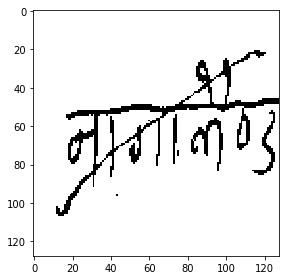

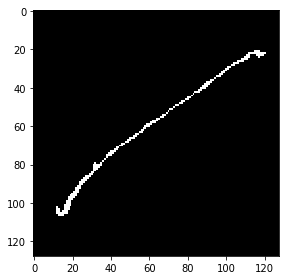

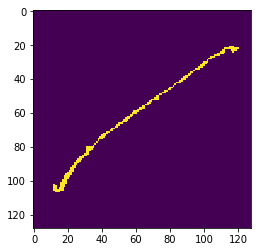

In [ ]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
plt.imshow(np.squeeze(preds_train_t[ix]))
plt.show()

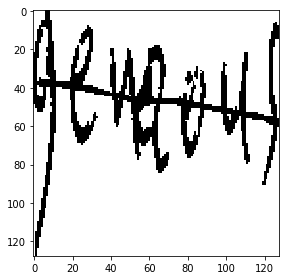

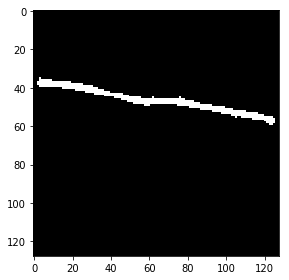

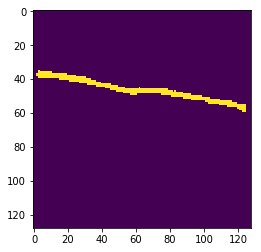

In [ ]:
# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
plt.imshow(np.squeeze(preds_val_t[ix]))
plt.show()

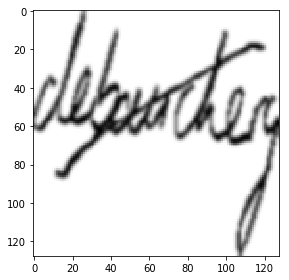

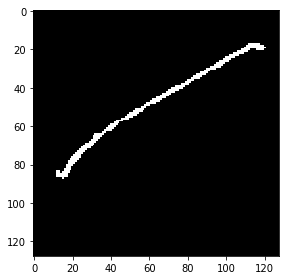

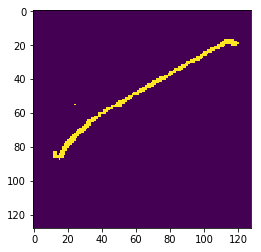

In [ ]:
# Perform a sanity check on some random test samples
ix = random.randint(0, len(preds_test_t))
imshow(cv2.GaussianBlur(X_test[ix],(5,5),0))
plt.show()
imshow(np.squeeze(Y_test[ix]))
plt.show()
plt.imshow(np.squeeze(preds_test_t[ix]))
plt.show()

/opt/conda/lib/python3.6/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


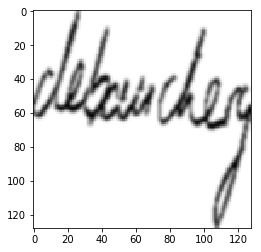

In [ ]:
img = img_as_ubyte(X_test[ix])
dst = cv2.inpaint(img,np.squeeze(preds_test_t[ix]),0,cv2.INPAINT_TELEA)
plt.imshow(cv2.GaussianBlur(dst,(5,5),0))
#plt.imshow(dst)

In [ ]:
def plot_examples(datax, datay, num_examples=20):
    fig, ax = plt.subplots(nrows=20, ncols=3, figsize=(24,4*num_examples))
    m = datax.shape[0]
    for row_num in range(num_examples):
        image_indx = np.random.randint(m)
        #image_arr = unet(torch.from_numpy(datax[image_indx:image_indx+1]).float().cuda()).squeeze(0).detach().cpu().numpy()
        ax[row_num][0].imshow(cv2.GaussianBlur(X_test[image_indx],(5,5),0))
        ax[row_num][0].set_title("Orignal Image")
        ax[row_num][1].imshow(np.squeeze(preds_test_t[image_indx]))
        ax[row_num][1].set_title("Segmented Image")
        img = img_as_ubyte(X_test[image_indx])
        dst = cv2.inpaint(img,np.squeeze(preds_test_t[image_indx]),0,cv2.INPAINT_TELEA)
        ax[row_num][2].imshow(cv2.GaussianBlur(dst,(5,5),0))
        ax[row_num][2].set_title("Cleaned Image")
    plt.show()

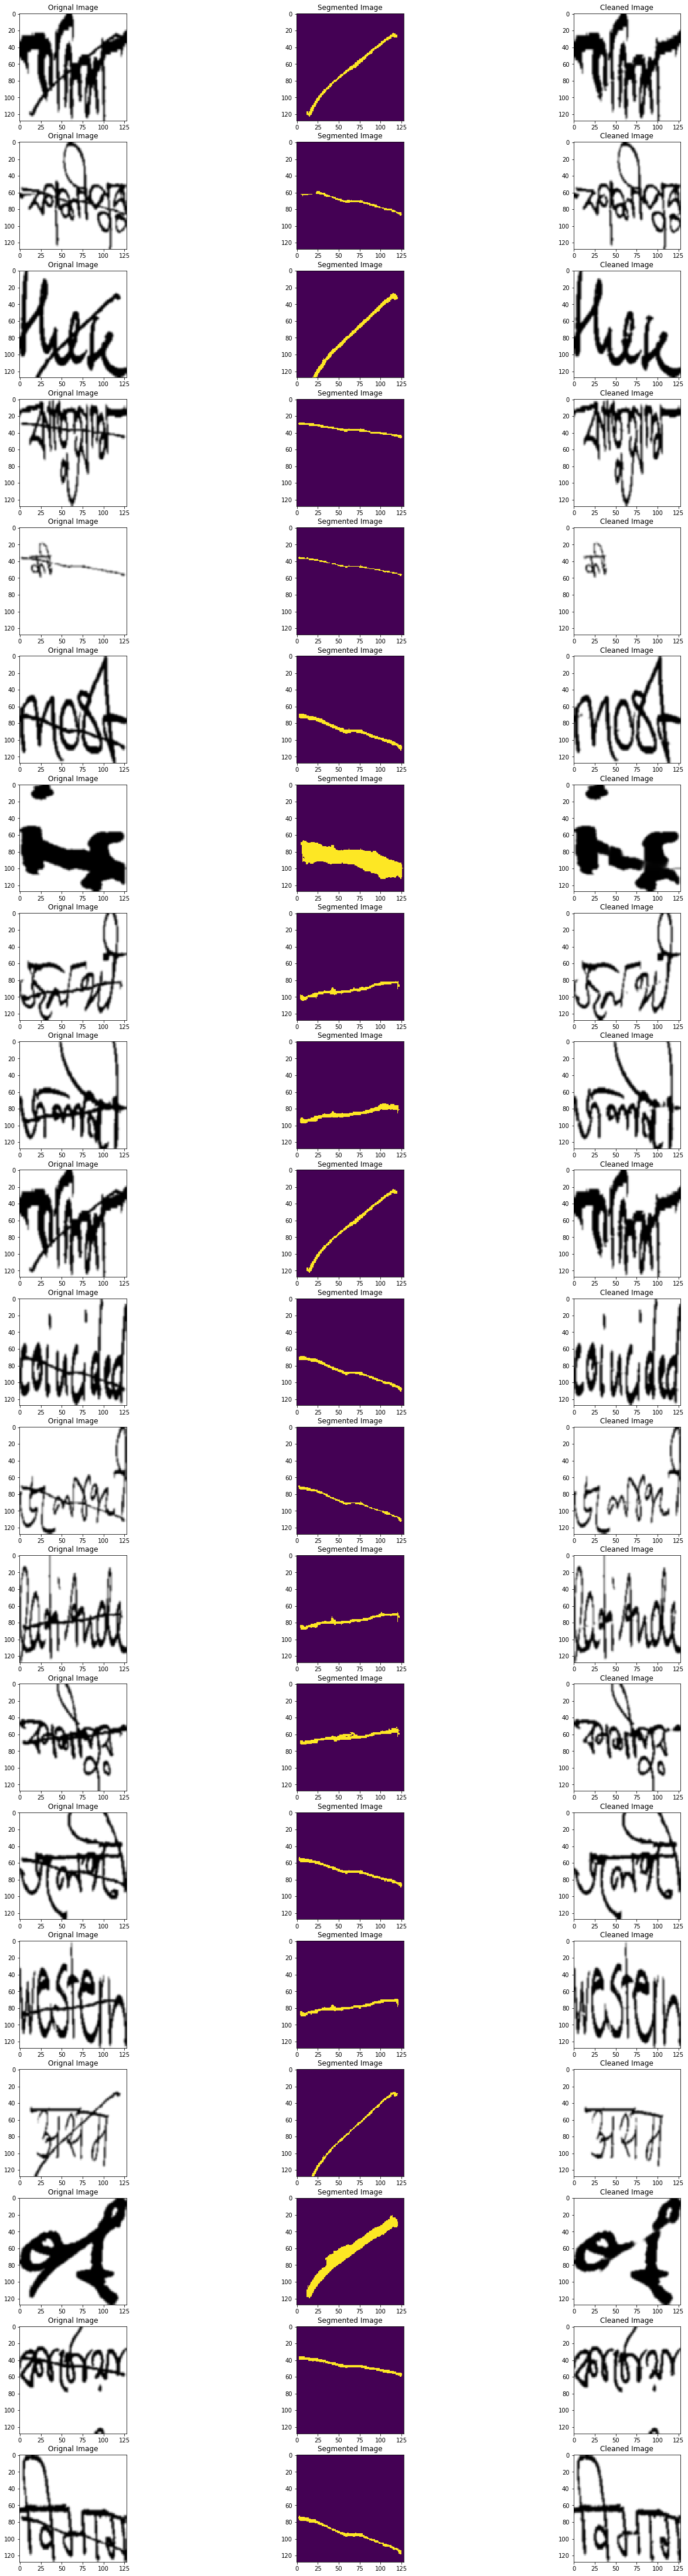

In [ ]:
plot_examples(X_test, Y_test)

**IOU with optimum threshold**

In [ ]:
from tqdm import tqdm_notebook

def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = y_true_in
    y_pred = y_pred_in
    
    true_objects = 2
    pred_objects = 2

    intersection = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]

    # Compute areas (needed for finding the union between all objects)
    area_true = np.histogram(labels, bins = true_objects)[0]
    area_pred = np.histogram(y_pred, bins = pred_objects)[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Compute union
    union = area_true + area_pred - intersection

    # Exclude background from the analysis
    intersection = intersection[1:,1:]
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Compute the intersection over union
    iou = intersection / union

    # Precision helper function
    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1   # Correct objects
        false_positives = np.sum(matches, axis=0) == 0  # Missed objects
        false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

    # Loop over IoU thresholds
    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp / (tp + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    
    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)


def iou_metric_batch(y_true_in, y_pred_in):
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    return np.mean(metric)

thresholds = np.linspace(0, 1, 50)
ious = np.array([iou_metric_batch(Y_test, np.int32(preds_test > threshold)) for threshold in tqdm_notebook(thresholds)])

In [ ]:
threshold_best_index = np.argmax(ious[9:-10]) + 9
iou_best = ious[threshold_best_index]
threshold_best = thresholds[threshold_best_index]

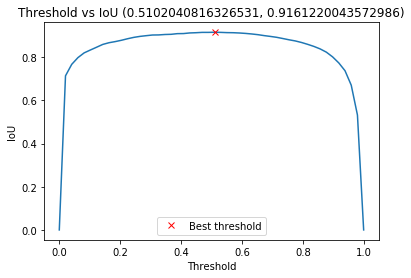

In [ ]:
plt.plot(thresholds, ious)
plt.plot(threshold_best, iou_best, "xr", label="Best threshold")
plt.xlabel("Threshold")
plt.ylabel("IoU")
plt.title("Threshold vs IoU ({}, {})".format(threshold_best, iou_best))
plt.legend()

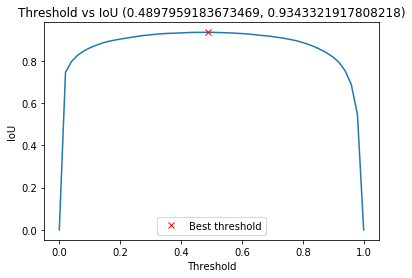

In [ ]:
thresholds = np.linspace(0, 1, 50)
ious = np.array([iou_metric_batch(y_train[:int(X_train.shape[0]*0.9)], np.int32(preds_train > threshold)) for threshold in tqdm_notebook(thresholds)])

threshold_best_index = np.argmax(ious[9:-10]) + 9
iou_best = ious[threshold_best_index]
threshold_best = thresholds[threshold_best_index]

plt.plot(thresholds, ious)
plt.plot(threshold_best, iou_best, "xr", label="Best threshold")
plt.xlabel("Threshold")
plt.ylabel("IoU")
plt.title("Threshold vs IoU ({}, {})".format(threshold_best, iou_best))
plt.legend()

In [ ]:
model.evaluate(X_train[:int(X_train.shape[0]*0.9)], Y_train[:int(X_train.shape[0]*0.9)])

2336/2336 [==============================] - 2s 895us/step


[0.005628218788219845,
 0.997809841208262,
 0.968519971795278,
 0.9680396195960371,
 0.9690444730732539]